<a href="https://colab.research.google.com/github/shishiraiyar/AIML-lab/blob/main/K_Nearest_Neighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

import numpy as np
from collections import Counter

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
class KNN:
  def __init__(self, k=3):
    self.k = k

  def fit(self, x, y):
    self.x_train = x
    self.y_train = y

  def predictOne(self, x):
    distances = [np.linalg.norm(x - trainInst) for trainInst in self.x_train]
    k_indices = np.argsort(distances)[:self.k]

    k_labels = [self.y_train[i] for i in k_indices]
    self.ctr = Counter(k_labels)
    return self.ctr.most_common(1)[0][0]

  def predict(self, x):
    return [self.predictOne(xInst) for xInst in x]

In [5]:
knn = KNN(k=3)
knn.fit(x_train, y_train)

In [6]:
y_pred = knn.predict(x_test)
np.mean(y_pred == y_test)

1.0

<Axes: >

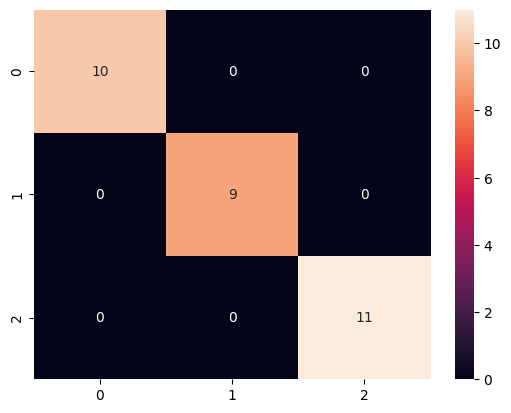

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)